In [383]:
%load_ext autoreload
%autoreload 2

import easyCGD
import pandas as pd

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
in_sp_abunds_flat = "/home/isaac/SGD_empirical/empirical_reunion_spiders/abunds_flat.txt"
in_sp_abunds_df = "/home/isaac/SGD_empirical/empirical_reunion_spiders/spider_abunds_df.txt"
in_sp_fasta = "/home/isaac/SGD_empirical/empirical_reunion_spiders/spider-fasta/"
in_moth_fasta = "/home/isaac/SGD_empirical/empirical_micromoths/micromoth_fasta_aligned/"
in_wvm_fasta = "/home/isaac/SGD_empirical/empirical_weevils/weevil_fasta/mauritius/"
in_wvr_fasta = "/home/isaac/SGD_empirical/empirical_weevils/weevil_fasta/reunion/"
sp_abund_df = easyCGD.load_data(in_sp_abunds, labels="spiders")
sp_pis_df = easyCGD.get_pis_from_fastas(in_sp_fasta, outfile="spider.pis", colname="spiders")
mo_pis_df = easyCGD.get_pis_from_fastas(in_moth_fasta, outfile="moth.pis", colname="moths")
wvm_pis_df = easyCGD.get_pis_from_fastas(in_wvm_fasta, outfile="weevils_mauritius.pis", colname="weevils_mauritius")
wvr_pis_df = easyCGD.get_pis_from_fastas(in_wvr_fasta, outfile="weevils_reunion.pis", colname="weevils_reunion")


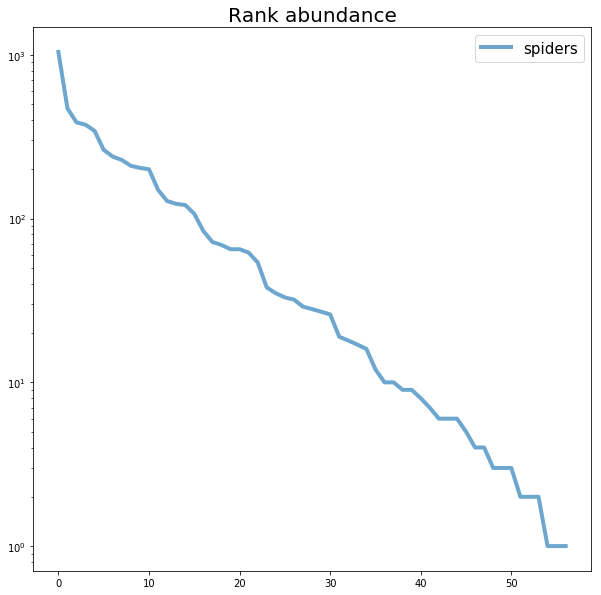

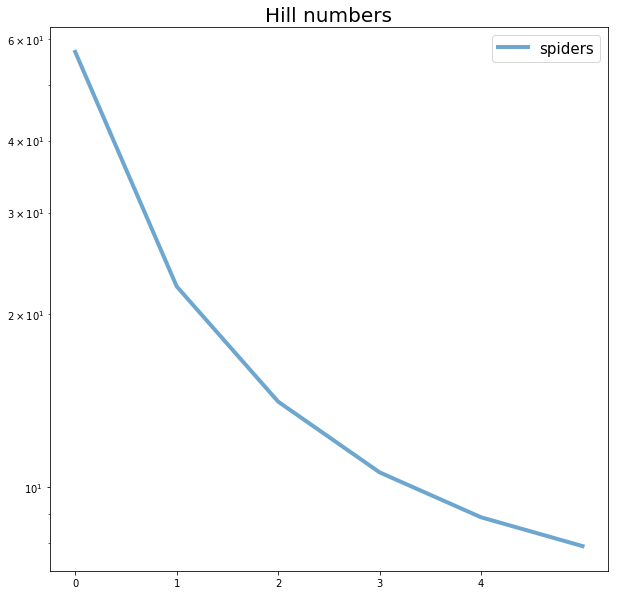

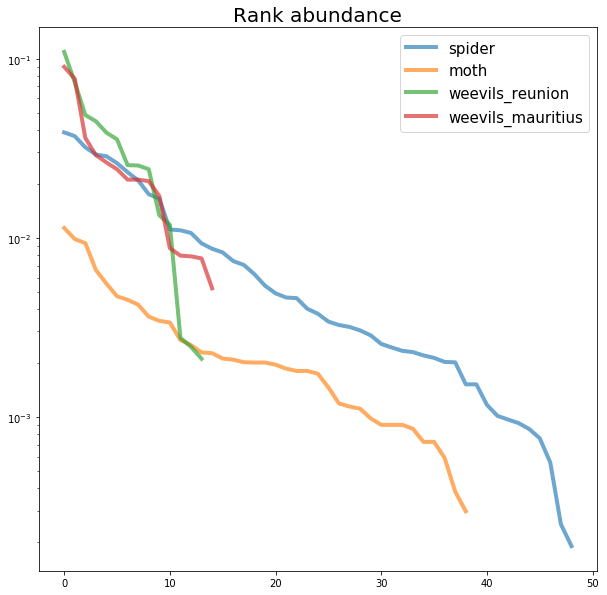

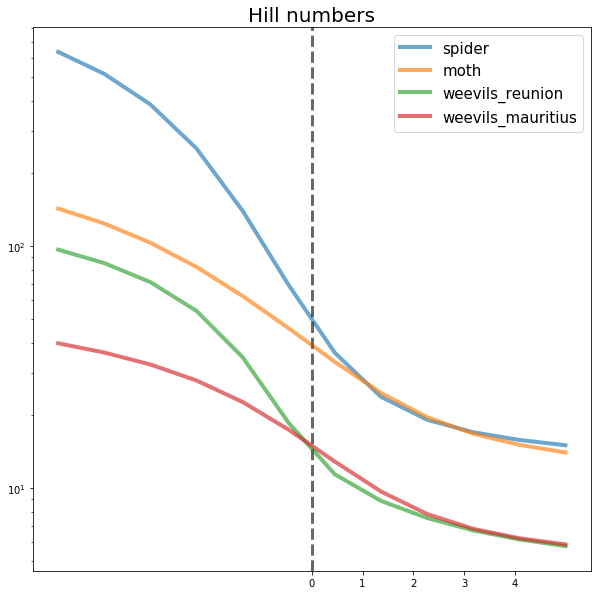

In [388]:

sp_abund_df = easyCGD.load_data(in_sp_abunds_df, labels="spiders")
sp_pis_df = easyCGD.load_data("spider.pis")
mo_pis_df = easyCGD.load_data("moth.pis")
wvm_pis_df = easyCGD.load_data("weevils_mauritius.pis")
wvr_pis_df = easyCGD.load_data("weevils_reunion.pis")

easyCGD.plot_RACs(sp_abund_df)
easyCGD.plot_hill_numbers(sp_abund_df)
ax = easyCGD.plot_RACs(sp_pis_df)
_ = easyCGD.plot_RACs(mo_pis_df, ax=ax)
_ = easyCGD.plot_RACs(wvr_pis_df, ax=ax)
_ = easyCGD.plot_RACs(wvm_pis_df, ax=ax)

ax = easyCGD.plot_hill_numbers(sp_pis_df, do_negative=True)
_ = easyCGD.plot_hill_numbers(mo_pis_df, ax=ax, do_negative=True)
_ = easyCGD.plot_hill_numbers(wvr_pis_df, ax=ax, do_negative=True)
_ = easyCGD.plot_hill_numbers(wvm_pis_df, ax=ax, do_negative=True)


## If you have abundance and genetic diversity information you can look at the correlation between these

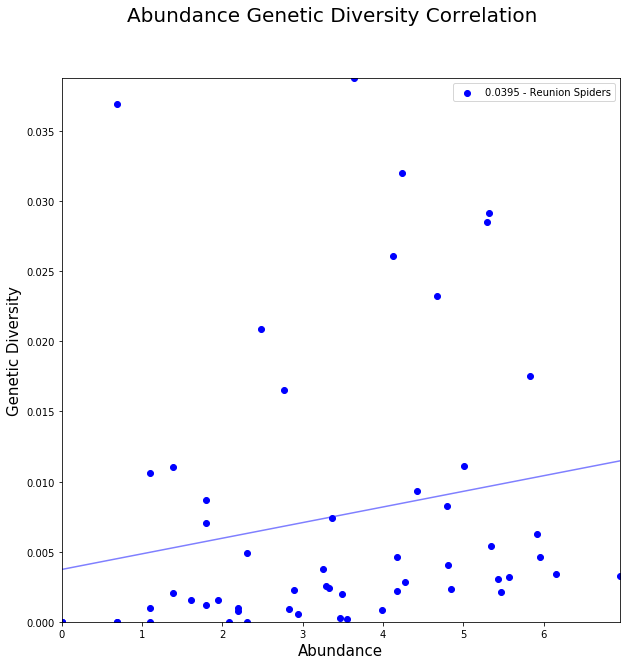

In [176]:
easyCGD.plot_abundance_diversity_correlation(sp_abund_df, sp_pis_df, log_transform=True)

## Experimental below here
Here messing with the aquatic meta-data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


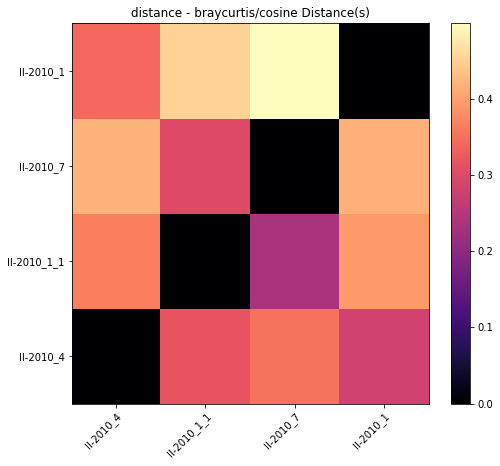

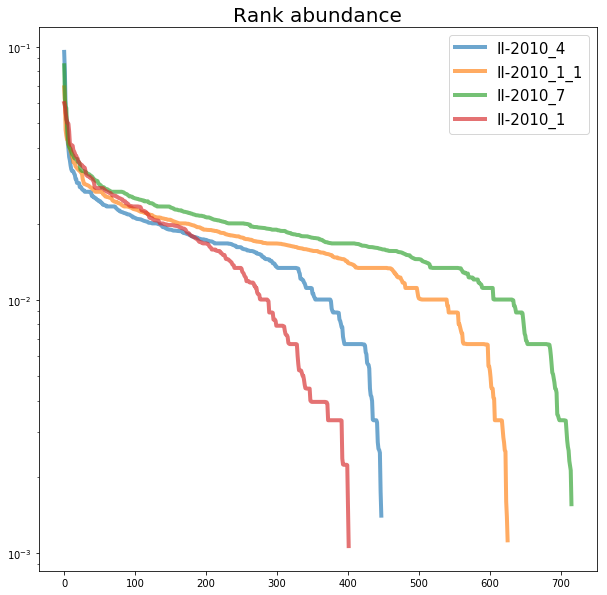

In [387]:
%load_ext autoreload
%autoreload 2

import easyCGD


f = glob.glob("/home/isaac/easyCGD/jupyter-notebooks/aquatic_obs/II/II-2010*.pis")
df = easyCGD.load_dfs(f)
dat = df.T.fillna(value=0)
easyCGD.plot_distances(dat, labels=df.columns, metric=["braycurtis", "cosine"])

ax = easyCGD.plot_RACs(df)
#for pi in f[1:]:
#    _ = easyCGD.plot_RACs(dfs[pi], ax=ax)
#df

array([[ 0.        ,  0.31664437,  0.35168632,  0.28419961],
       [ 0.36536352,  0.        ,  0.23458501,  0.39315315],
       [ 0.4194315 ,  0.29907951,  0.        ,  0.41644136],
       [ 0.34016633,  0.45308696,  0.49920148,  0.        ]])

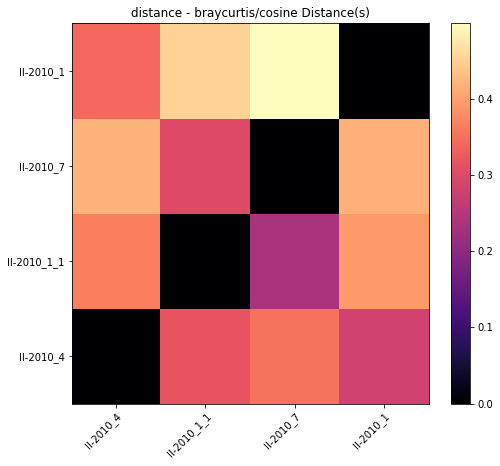

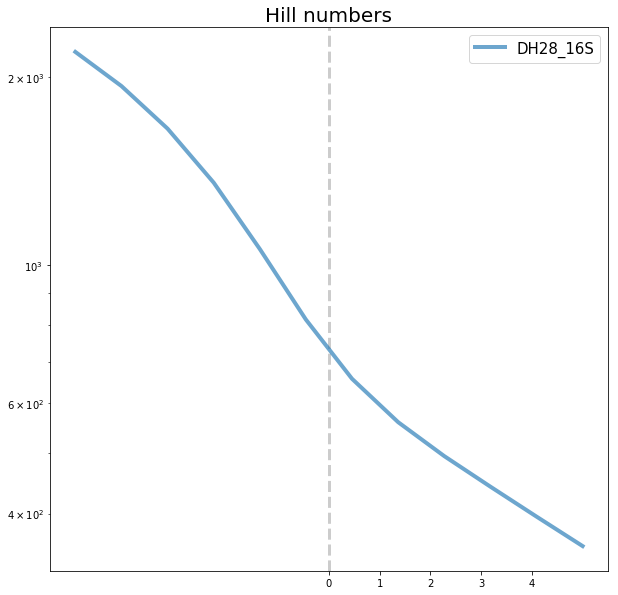

In [24]:
ax = easyCGD.plot_hill_numbers(dfs["DH28_16S"], do_negative=True)


## Figuring out KL divergence between abundance and genetics

* [Useful entropy/KL chapter](https://www.stat.cmu.edu/~cshalizi/754/2006/notes/lecture-28.pdf)

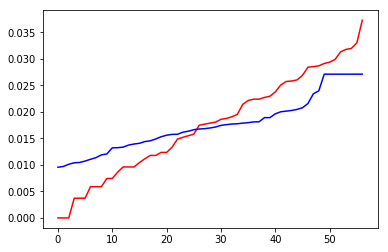

In [255]:
from scipy.stats import entropy

prop = True

sp_abund_df = easyCGD.load_data(in_sp_abunds_df, labels="spiders")
sp_pis_df = easyCGD.load_data("spider.pis")

sp_abund_df = np.log(sp_abund_df)
sp_pis_df = np.log(sp_pis_df+0.0001)
if prop:
    ak = (sp_abund_df/float(sp_abund_df.sum()))
    pk = (sp_pis_df/float(sp_pis_df.sum()))
else:
    ak = sp_abund_df
    pk = sp_pis_df
ak = np.sort(ak.iloc[:, 0].values)
pk = np.sort(pk.iloc[:, 0].values)
plt.plot(ak, color="r")
plt.plot(pk, color="b")
#entropy(pk, qk)

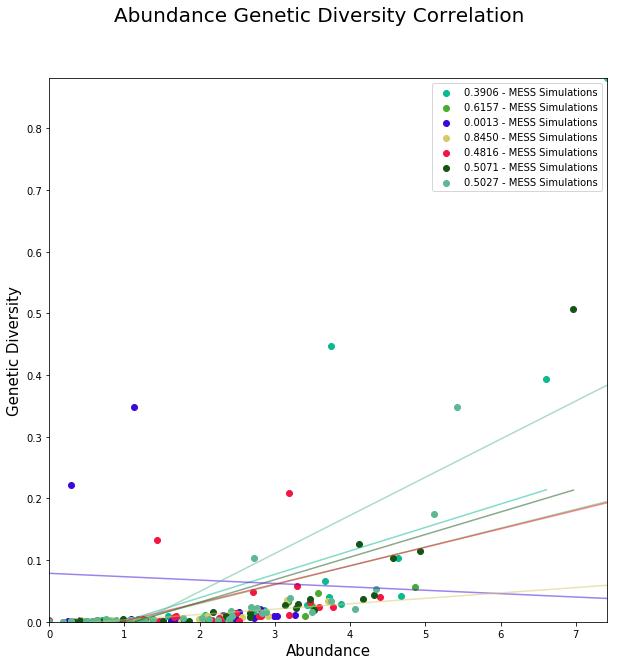

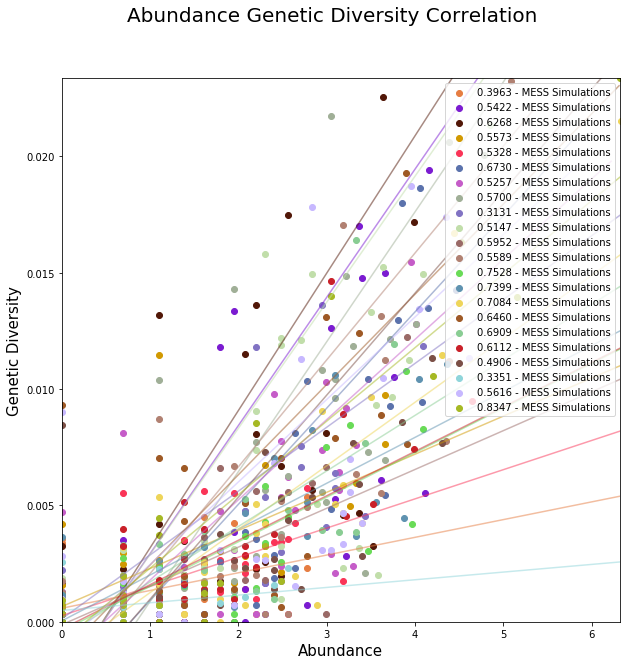

In [306]:
import glob
simfile = "/home/isaac/Continuosity/MESS/MESS/lessmig_MESS/wat-071834165/island1-0.908-megalog.txt"
sim = pd.read_csv(simfile)
sim_abund = pd.DataFrame(sim["Ne_local"])
sim_pi = pd.DataFrame(sim["pi_local"])
#easyCGD.plot_abundance_diversity_correlation(sim_abund/100, sim_pi, log_transform=True)

simfiles = glob.glob("/home/isaac/Continuosity/MESS/MESS/5kharm-lowmig_MESS/wat-133*/*megalog.txt")
fig, ax = plt.subplots(figsize=(10,10))
for simfile in simfiles:
    #print(simfile)
    sim = pd.read_csv(simfile)
    sim_abund = pd.DataFrame(sim["Ne_local"])
    sim_pi = pd.DataFrame(sim["pi_local"])
    easyCGD.plot_abundance_diversity_correlation(sim_abund/100, sim_pi, log_transform=True, ax=ax)
    
simfiles = glob.glob("/home/isaac/Continuosity/MESS/MESS/constlessmig_MESS/wat-5513*/*megalog.txt")
fig, ax = plt.subplots(figsize=(10,10))
for simfile in simfiles:
    #print(simfile)
    sim = pd.read_csv(simfile)
    sim_abund = pd.DataFrame(sim["Ne_local"])
    sim_pi = pd.DataFrame(sim["pi_local"])
    easyCGD.plot_abundance_diversity_correlation(sim_abund/100, sim_pi, log_transform=True, ax=ax)
#sim_abund

In [377]:
df
for c in df.columns:
    print(c)

II-2010_4
II-2010_1_1
II-2010_7
II-2010_1
